# ASSIGNMENT 7

## Kernel Ridge Regression and Regular Ridge Regression

In [74]:
#importing the libraries

%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


# import test and train file

train = pd.read_csv('data.csv')
train.head()

,Blue,Green,Red,Class
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [75]:
# importing ridge regression from sklearn

from sklearn.linear_model import Ridge

# splitting into training and cv for cross validation

from sklearn.model_selection import train_test_split
x = train.iloc[:,0:2]
y=train.iloc[:,3].values
x_train, x_cv, y_train, y_cv = train_test_split(x,train.Class)

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_cv=sc.fit_transform(x_cv)

In [77]:
# training the model

ridgeReg = Ridge(alpha=0.5, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)

In [78]:
mse = np.mean((pred - y_cv)**2)
mse

0.22913613068521518

In [79]:
from sklearn.metrics import r2_score
r2_score(y_cv, pred)

0.083196718701027184

In [80]:
# importing kernel_ridge regression from sklearn

from sklearn.kernel_ridge import KernelRidge

# training the model

kridgeReg = KernelRidge(alpha=0.5)
kridgeReg.fit(x_train,y_train) 
pred1 = kridgeReg.predict(x_cv)

In [81]:
mse1 = np.mean((pred1 - y_cv)**2)
mse1

2.394971480384792

#### From the mean square errors of Regular Ridge and Kernel Ridge Regression, we observe that Regular Ridge Regression is more suited for our dataset.

#  Comparison between linear, polynomial, and RBF kernels in SVM

In [82]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
# Importing the dataset
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:,0:2].values
y = dataset.iloc[:,3].values

In [84]:
dataset.head()

,Blue,Green,Red,Class
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [85]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [86]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\ddalv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [87]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [89]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 984,    3],
       [  11, 1002]], dtype=int64)

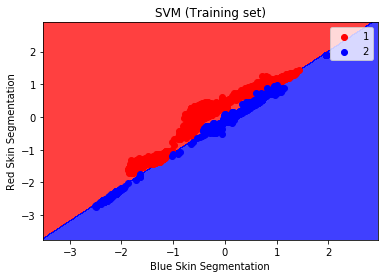

In [90]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Blue Skin Segmentation')
plt.ylabel('Red Skin Segmentation')
plt.legend()
plt.show()

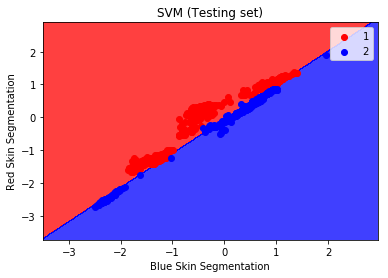

In [91]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Testing set)')
plt.xlabel('Blue Skin Segmentation')
plt.ylabel('Red Skin Segmentation')
plt.legend()
plt.show()

In [92]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf', random_state = 0)
classifier1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)

In [94]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[ 986,    1],
       [   2, 1011]], dtype=int64)

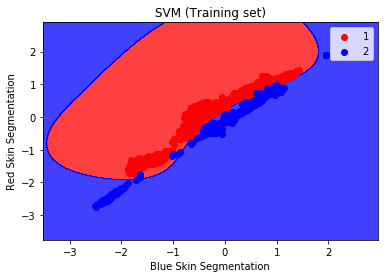

In [95]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Blue Skin Segmentation')
plt.ylabel('Red Skin Segmentation')
plt.legend()
plt.show()

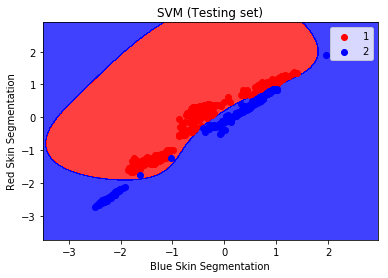

In [96]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Testing set)')
plt.xlabel('Blue Skin Segmentation')
plt.ylabel('Red Skin Segmentation')
plt.legend()
plt.show()

In [97]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'poly', degree = 3, random_state = 0, coef0=0.1)
classifier2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)

In [99]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[ 984,    3],
       [  11, 1002]], dtype=int64)

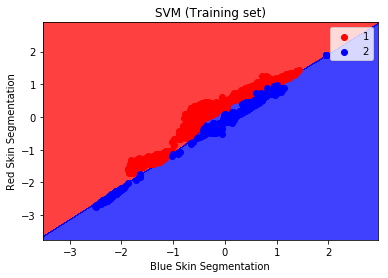

In [100]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Blue Skin Segmentation')
plt.ylabel('Red Skin Segmentation')
plt.legend()
plt.show()

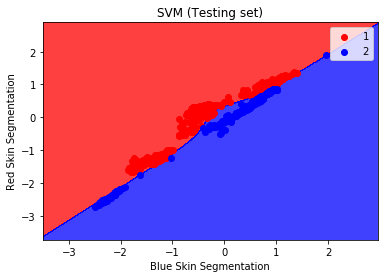

In [101]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Testing set)')
plt.xlabel('Blue Skin Segmentation')
plt.ylabel('Red Skin Segmentation')
plt.legend()
plt.show()